# MRI Brain Tumor Classification

### Introduction

This is a personal project to practice image classification using Tensorflow/Keras. The project should be run in WSL to utilize GPU acceleration to speed up training. 

The following __[dataset](https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset/data)__ is used for this project. The training and testing data is already separated by the __[creator](https://www.kaggle.com/masoudnickparvar)__ of the dataset, so I will be using that split.


### Package Imports

In [41]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import tensorflow as tf

import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

#### Packages Used
* Tensorflow for neural network
* Pathlib for accessing dataset location
* Numpy for algebra operations
* Pandas for dataframes
* Matplotlib for data visualization

### Image Preprocessing

In [42]:
DATA_DIR = pathlib.Path('Dataset')
TRAIN_DIR = DATA_DIR / 'Training'
TEST_DIR = DATA_DIR / 'Testing'

BATCH_SIZE = 16
IMG_HEIGHT = 256
IMG_WIDTH = 256

train_ds = tf.keras.utils.image_dataset_from_directory(
    TRAIN_DIR,
    color_mode='grayscale',
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE)

val_ds = tf.keras.utils.image_dataset_from_directory(
    TEST_DIR,
    color_mode='grayscale',
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE)

NUM_CLASSES = len(train_ds.class_names)

Found 5712 files belonging to 4 classes.
Found 1311 files belonging to 4 classes.


#### Input Data

Here is a bar graph of the number of training and testing data split by the the 4 possible classifications. And a table with the count of elements of each classification.

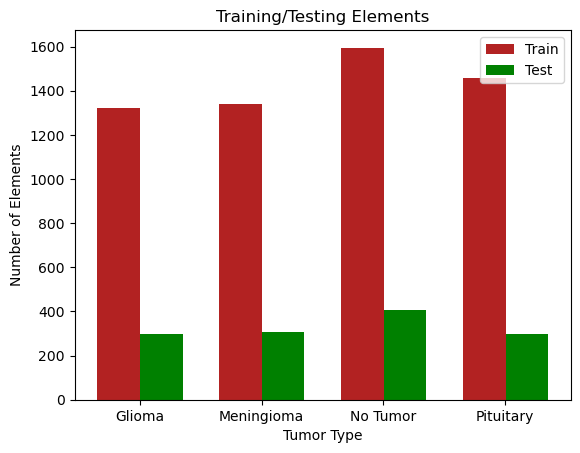

In [43]:
CLASS_NAMES = ['Glioma', 'Meningioma', 'No Tumor', 'Pituitary']
LEGEND_LABELS = ['Train', 'Test']

value_dict = {'Glioma':[0,0], 'Meningioma':[0,0], 'No Tumor':[0,0], 'Pituitary':[0,0]}
l1, l2 = list(), list()

for images, labels in train_ds:
    for i in labels:
        value_dict[CLASS_NAMES[i]][0] += 1    

for images, labels in val_ds:
    for i in labels:
        value_dict[CLASS_NAMES[i]][1] += 1

for value in value_dict.values():
    l1.append(value[0])
    l2.append(value[1])

bar1 = np.arange(NUM_CLASSES) 
bar2 = [x + 0.35 for x in bar1] 
plt.bar(bar1, l1, width=0.35, label='Train', color='firebrick')
plt.bar(bar2, l2, width=0.35, label='Test', color='green')
plt.xticks(np.arange(0.1725, 4.1725, 1), list(CLASS_NAMES))

plt.xlabel('Tumor Type')
plt.ylabel('Number of Elements')
plt.legend(LEGEND_LABELS, loc='upper right')
plt.title('Training/Testing Elements')

plt.show()

Here is another representation of the same date, in pie chart form. The shades of red are training, and the greens are the test data.

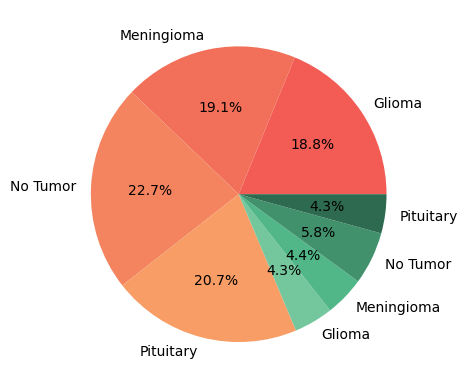

In [44]:
pie_vals = l1 + l2
pie_labels = CLASS_NAMES + CLASS_NAMES

colors = ["#f25c54", "#f27059", "#f4845f", "#f79d65", "#74c69d", "#52b788", "#40916c", "#2d6a4f"]

fig, ax = plt.subplots()
pie_out = plt.pie(pie_vals, labels=pie_labels, autopct='%1.1f%%', colors=colors)

Training and Testing Split represented as a DataFrame

In [45]:
df = pd.DataFrame.from_dict(value_dict)
df

,Glioma,Meningioma,No Tumor,Pituitary
0,1321,1339,1595,1457
1,300,306,405,300


Here are some example images from the test dataset. They are grayscale, but are represented here with colors for higher contrast. The title above every image is its classification as provided by the dataset.

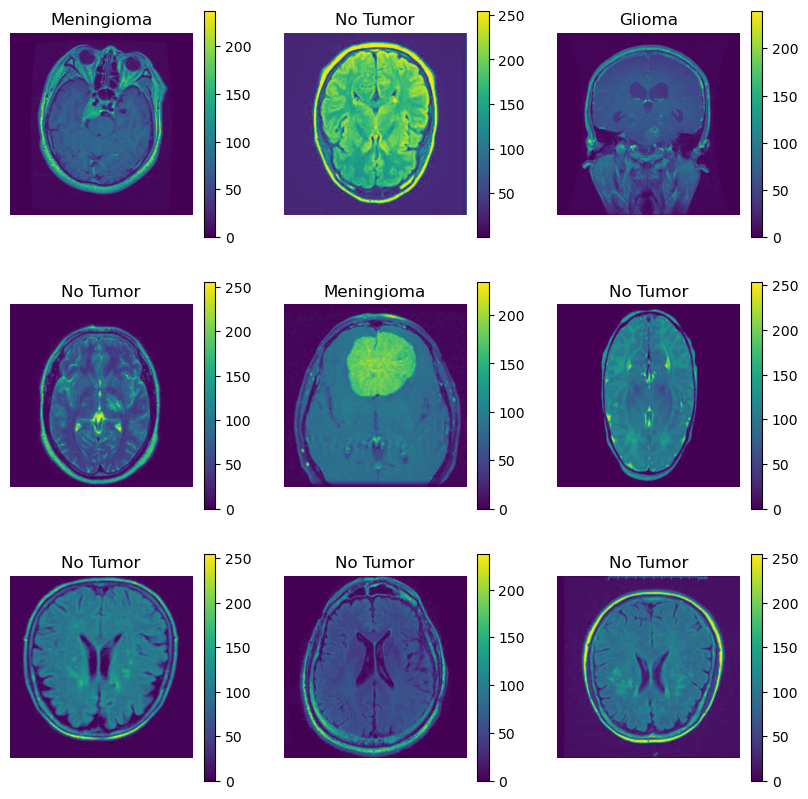

In [46]:
plt.figure(figsize=(10, 10))
for images, labels in val_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy())
        plt.title(CLASS_NAMES[labels[i]])
        plt.axis("off")
        plt.colorbar()

plt.show()

### Model Training

In [47]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

model = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
    tf.keras.layers.Rescaling(1./255),

    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(128, activation='relu'),
    
    tf.keras.layers.Dense(NUM_CLASSES)
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=15
)

Epoch 1/15


357/357 [==============================] - 43s 117ms/step - loss: 0.5978 - accuracy: 0.7551 - val_loss: 0.4235 - val_accuracy: 0.8299
Epoch 2/15
357/357 [==============================] - 41s 116ms/step - loss: 0.3130 - accuracy: 0.8796 - val_loss: 0.3055 - val_accuracy: 0.8863
Epoch 3/15
357/357 [==============================] - 41s 114ms/step - loss: 0.2093 - accuracy: 0.9221 - val_loss: 0.1898 - val_accuracy: 0.9245
Epoch 4/15
357/357 [==============================] - 42s 118ms/step - loss: 0.1470 - accuracy: 0.9473 - val_loss: 0.1875 - val_accuracy: 0.9336
Epoch 5/15
357/357 [==============================] - 40s 113ms/step - loss: 0.0982 - accuracy: 0.9664 - val_loss: 0.1992 - val_accuracy: 0.9314
Epoch 6/15
357/357 [==============================] - 41s 115ms/step - loss: 0.0762 - accuracy: 0.9746 - val_loss: 0.1569 - val_accuracy: 0.9519
Epoch 7/15
357/357 [==============================] - 41s 116ms/step - loss: 0.0563 - accuracy: 0.9816 - val_loss: 0.1491 - val_accuracy: 0.9

This was run on WSL with GPU speedup.

The model ends with a 97% accuracy with around a 1% margin of error after 15 epochs.

### Results

##### Model Testing

In [48]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions_native = probability_model.predict(val_ds) # Predictions on natively run model

82/82 [==============================] - 2s 24ms/step


In [49]:
label_list = []

for images, labels in val_ds:
    label_list.extend(labels.numpy().tolist())

Here is a display of some images from the validation set followed by a bar graph of the predictions made by the model. The classifications have been shortened to the first letter due to the large graphic. The classification is written out above the image, it will be red if the model is incorrect. Likewise, only the correct bar in the bar graph will be blue, the incorrect predictions will be red.

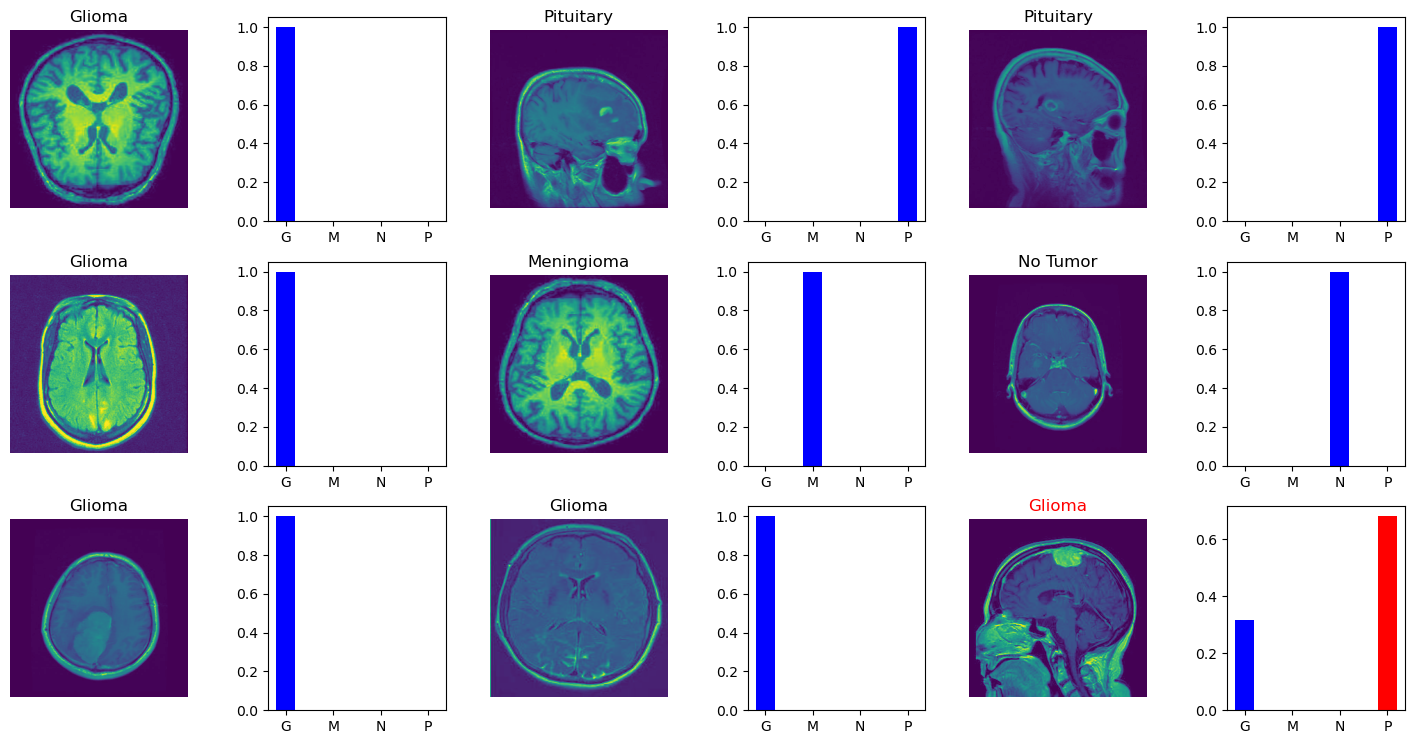

<Figure size 640x480 with 0 Axes>

In [50]:
CLASS_NAMES_SHORT = ['G', 'M', 'N', 'P']
bar_colors = ['red', 'red', 'red', 'red']

fig = plt.figure(figsize=(18, 9))

outer = gridspec.GridSpec(3, 3, wspace=0.1, hspace=0.2)

for i in range(9):
    inner = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=outer[i], wspace=0.45, hspace=0.2)

    image = plt.Subplot(fig, inner[0])
    graph = plt.Subplot(fig, inner[1])

    # Image settings
    image.imshow(images[i].numpy())
    image.axis('off')
    image.title.set_text(CLASS_NAMES[label_list[i]])
    if(np.argmax(predictions_native[i]) != label_list[i]):
        image.title.set_color('red')

    # Graph settings
    bar_colors[label_list[i]] = 'blue'
    graph.bar(CLASS_NAMES_SHORT, predictions_native[i], width=0.4, color = bar_colors)
    
    # Plotting Data    
    fig.add_subplot(image)
    fig.add_subplot(graph)

    # Resetting colors
    for i in range(len(bar_colors)):
        bar_colors[i] = 'red'
plt.show()
plt.set_cmap("viridis") 

##### Model Statistics

Here are two line graphs demonstrating model accuracy and model loss over the epochs. The higher training accuracy and lower loss value compared to testing data indicate slight overfitting

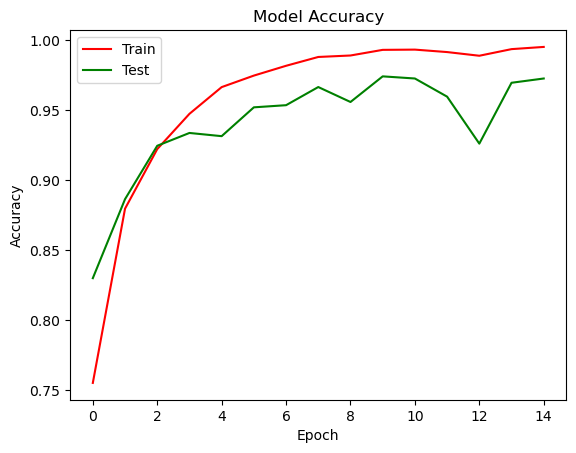

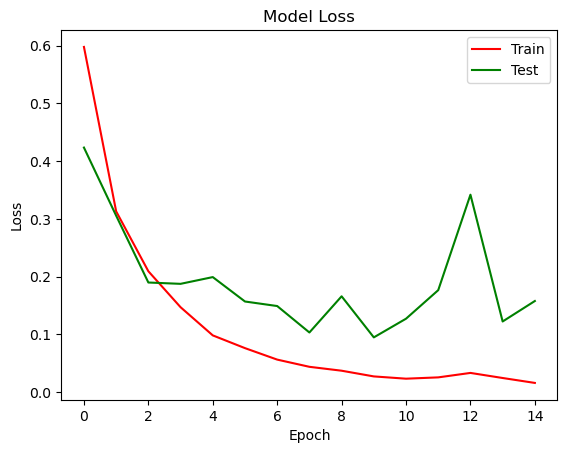

In [51]:
plt.plot(history.history['accuracy'], color='red')
plt.plot(history.history['val_accuracy'], color='green')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(LEGEND_LABELS, loc='upper left')
plt.show()

plt.plot(history.history['loss'], color='red')
plt.plot(history.history['val_loss'], color='green')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(LEGEND_LABELS, loc='upper right')
plt.show()

##### Prediction Accuracy

Here is a correlation matrix of the incorrect predictions that the model has made. The model struggles with Meningiomas the most. 

In [52]:
# Generate incorrect prediction matrix
def gen_inc_pred_matrix(predictions:list, labels=label_list) -> np.ndarray:
    matrix = [[0 for x in range(NUM_CLASSES)] 
                for y in range(NUM_CLASSES)] 
    
    for i in range(len(labels)):
        corr = labels[i]
        pred = np.argmax(predictions[i])
        if corr != pred:
            matrix[corr][pred] += 1
    return np.array(matrix)

# Generate Prediction Matrix
def gen_pred_graph(matrix: np.ndarray) -> None:
    fig, ax = plt.subplots()
    fig.tight_layout()
    im = ax.imshow(matrix, cmap='Reds')
    ax.set_xticks(range(NUM_CLASSES), labels=CLASS_NAMES)
    ax.set_yticks(range(NUM_CLASSES), labels=CLASS_NAMES)
    plt.ylabel('Label', weight='bold')
    plt.xlabel('Predicted', weight='bold')
    plt.title('Incorrect Predictions', weight='bold')

    for i in range(NUM_CLASSES):
        for j in range(NUM_CLASSES):
            text = ax.text(j, i, matrix[i, j], 
                            ha='center', va='center',)

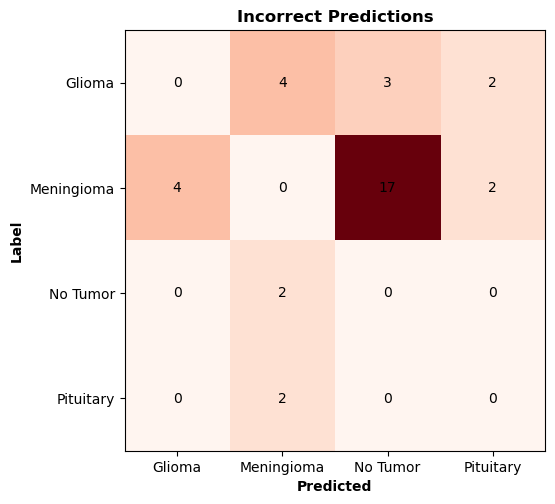

In [53]:
inc_pred_matrix = gen_inc_pred_matrix(predictions_native)
gen_pred_graph(inc_pred_matrix)

#### Attempt to Improve

I made an attempt to improve the accuracy of the model by ensembling together multiple models and taking the most common prediction that they give, but that resulted in a small gain in the accuracy when using 5 separately trained models compared to only using the most accurate of the 5. It has a prediction accuracy of 99.16%(compared to 98.7% of the best of the 5), but it increases the testing time by a factor of 5. In a medical setting this may be worth it as an incorrect prediction could have devasting effects.
This strategy can be taken to a much further extent than what I have done here, and should technically increase accuracy, but it will have dimishing returns in accuracy compared to a linear increase in testing time as the number of models increases. If this approach is taken, there should be 4*n + 1 models, to act as a tie breaker in case there is a tie.

82/82 [==============================] - 2s 24ms/step


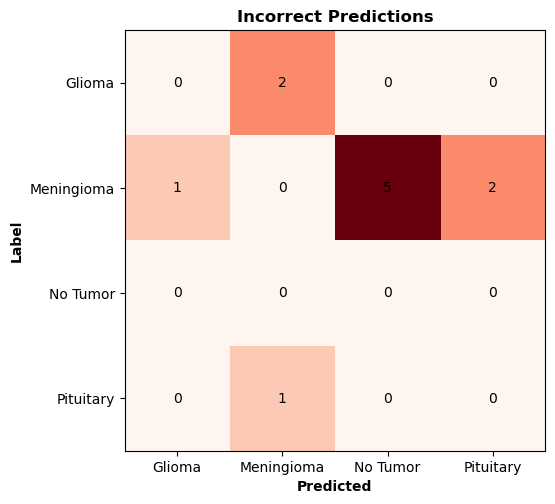

In [54]:
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE) # Shuffles and caches the validation ds
NUM_MODELS = 5

model_list = []
for i in range(1,NUM_MODELS+1):
    model_list.append(tf.keras.saving.load_model(f'Models/m{i}.h5'))

multi_predictions = np.zeros_like(model_list[0])

for model in model_list:
    prob_mod = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
    pred = prob_mod.predict(val_ds)
    multi_predictions = np.add(multi_predictions, pred)

multi_predictions = multi_predictions/(NUM_MODELS-1)

multi_inc_pred_matrix = gen_inc_pred_matrix(multi_predictions, label_list)
gen_pred_graph(multi_inc_pred_matrix)

#### Good Saved Model

One of the best trained models that I have been able to train has an accuracy of 98.7% on the test set is m4.h5 under the Models directory, here is a correlation matrix of the incorrect predictions of this model

82/82 [==============================] - 2s 25ms/step


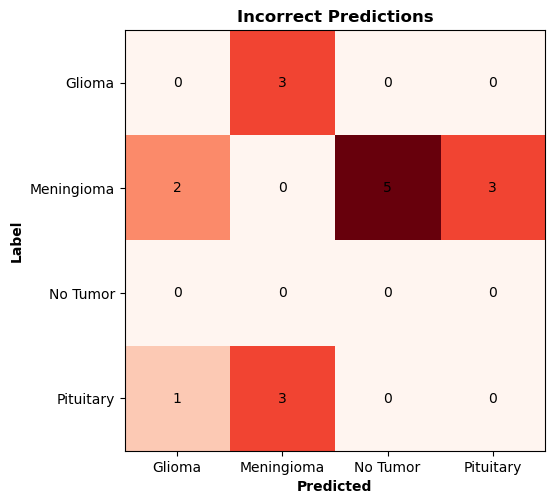

In [56]:
gmodel = tf.keras.Sequential([tf.keras.saving.load_model('Models/m4.h5'), tf.keras.layers.Softmax()])
predictions_gm = gmodel.predict(val_ds)

gen_pred_graph(gen_inc_pred_matrix(predictions_gm, label_list))

### Conclusions

Overall this is a good model, it can be improved in some ways to increase validation accuracy. These improvements would include techniques to prevent overfitting, be that modifying the data inputs or changing the model itself, or increasing the testing size. 

This project was used as a demonstration, and should not be used for any medical decisions. I may return to this project in the future and try to improve the accuracy, but I am currently satisfied with the results that I have received and skills I have gained from this project.